In [2]:
import numpy as np

In [3]:
def operacionFila(A,fil_m,fil_piv,factor):
    A[fil_m,:]=A[fil_m,:]-factor*A[fil_piv,:]

In [4]:
def escalonaSimple(A):
    nfil=A.shape[0]
    ncol=A.shape[1]

    for j in range(0,nfil):
        for i in range(j+1,nfil):
            factor=A[i,j]/A[j,j]
            operacionFila(A,i,j,factor)

In [5]:
A = np.array([[2,3,-1],
              [0,5,4],
              [0,0,6]])
b = np.array([-7,2,18])

#x = np.linalg.solve(A,b)
#print(x)

print(A)
print(b)

[[ 2  3 -1]
 [ 0  5  4]
 [ 0  0  6]]
[-7  2 18]


In [6]:
def sustRegresiva(A,b):     #Resuelve un sistema escalonado
    N=b.shape[0]   #A y b deben ser array numpy bidimensional
    x=np.zeros((N,1))
    for i in range(N-1,-1,-1):
        x[i,0]=(b[i,0]-np.dot(A[i,i+1:N],x[i+1:N,0]))/A[i,i]    
    return x #arra bidimensional


In [7]:
def sustProgresiva(A,b):   #Resuelve un sistema Triangular Inferior
    N=b.shape[0]   #A y b deben ser array numpy bidimensional
    x=np.zeros((N,1))
    for i in range(0,N):
        x[i,0]=(b[i,0]-np.dot(A[i,0:i],x[0:i,0]))/A[i,i]    
    return x #arra bidimensional

In [8]:
def Gausselimsimple(A,b):
    Ab=np.append(A,b,axis=1)
    escalonaSimple(Ab)
    A1=Ab[:,0:Ab.shape[1]-1].copy()
    b1=Ab[:,Ab.shape[1]-1].copy()
    b1=b1.reshape(b.shape[0],1)
    x=sustRegresiva(A1,b1)
    return x #array bidimensional

In [9]:
def intercambiFilas(A,fil_i,fil_j):
    A[[fil_i,fil_j],:]=A[[fil_j,fil_i],:]

In [10]:
def escalonaWithPiv(A):
    nfil=A.shape[0]
    ncol=A.shape[1]

    for j in range(0,nfil):
        imax=np.argmax(np.abs(A[j:nfil,j]))
        intercambiFilas(A,j+imax,j)
        for i in range(j+1,nfil):
            factor=A[i,j]/A[j,j]
            operacionFila(A,i,j,factor)

In [11]:
def GaussElimwithpiv(A,b):
    Ab=np.append(A,b,axis=1)
    escalonaWithPiv(Ab)
    A1=Ab[:,0:Ab.shape[1]-1].copy()
    b1=Ab[:,Ab.shape[1]-1].copy()
    b1=b1.reshape(b.shape[0],1)
    x=sustRegresiva(A1,b1)
    return x #array bidimensional

In [12]:
import numpy as np
#import libreria as lib
A=np.random.rand(4,4)
#print(A)
b=np.random.rand(4,1)
#print(b)
sol=Gausselimsimple(A,b)
print("Solution: ")
print(sol)
residuo=A@sol-b
print("\n Residuo:\n", residuo)


Solution: 
[[ 283.46717558]
 [-137.3535774 ]
 [-156.78073761]
 [  29.22735796]]

 Residuo:
 [[4.32986980e-15]
 [1.17683641e-14]
 [2.89768209e-14]
 [4.44089210e-16]]


In [13]:
import numpy as np
import time
#import libreria as lib
n=13
A=np.random.rand(n,n)
#print(A)
b=np.random.rand(n,1)
#print(b)

start_time=time.perf_counter()
sol=Gausselimsimple(A,b)
end_time=time.perf_counter()
elapsed_time=end_time-start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")

print("Solution: ")
print(sol)
residuo=A@sol-b
print("\n Residuo:\n", residuo)

Elapsed time: 0.0006 seconds
Solution: 
[[ -0.76272215]
 [  8.13766087]
 [ 12.23189762]
 [ -9.91907243]
 [ 14.18288314]
 [-10.05122158]
 [ 11.97869202]
 [ -7.01941877]
 [-15.72290048]
 [  0.88049975]
 [-10.82584179]
 [ 12.52564377]
 [-11.62398858]]

 Residuo:
 [[-1.11022302e-15]
 [-3.96904731e-15]
 [ 2.77555756e-16]
 [ 8.32667268e-17]
 [-9.02056208e-16]
 [ 4.85722573e-14]
 [ 8.16013923e-14]
 [ 0.00000000e+00]
 [ 1.54321000e-14]
 [ 3.27654570e-14]
 [-2.17603713e-14]
 [ 1.17683641e-14]
 [ 3.95239397e-14]]


In [14]:
n=180
A=np.random.rand(n,n)
b=np.random.rand(n,1)

X=GaussElimwithpiv(A,b)
normErr1=np.linalg.norm(A@X-b,1)

X=Gausselimsimple(A,b)
normErr2=np.linalg.norm(A@X-b,1)

X=np.linalg.solve(A,b)
normErr3=np.linalg.norm(A@X-b,1)



In [15]:
def LUdecomposition(A):
    nrows=A.shape[0]
    
    U=A.copy()
    L=np.eye(nrows,nrows,dtype=np.float64)
    for col in range(0,nrows-1):
        for row in range(col+1,nrows):
            factor=U[row,col]/U[col,col]
            L[row,col]=factor
            operacionFila(U,row,col,factor)
    return L,U

            

In [16]:
n=4
A = np.random.rand(n,n)
LU=LUdecomposition(A)
L = LU[0]
U = LU[1]
print("L=", L)
print("U=\n", U)
print("nA:\n", A-L@U)

L= [[ 1.          0.          0.          0.        ]
 [ 0.58511862  1.          0.          0.        ]
 [ 0.86762218 -0.1449416   1.          0.        ]
 [ 0.88305504  0.59884959 -2.90725114  1.        ]]
U=
 [[ 5.56136989e-01  5.17144256e-01  5.68265969e-01  7.53894472e-01]
 [ 0.00000000e+00 -2.97140374e-01  5.55781163e-01 -1.11482172e-01]
 [ 0.00000000e+00  0.00000000e+00  1.69896341e-01 -3.35445808e-01]
 [ 0.00000000e+00  0.00000000e+00  5.55111512e-17 -1.54108285e+00]]
nA:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11022302e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.55111512e-17]
 [ 0.00000000e+00  0.00000000e+00  5.55111512e-17  0.00000000e+00]]


In [17]:
def SolvByLU(A,b):
    LU = LUdecomposition(A)
    L = LU[0]
    U = LU[1]

    Y = sustProgresiva(L,b)
    X = sustRegresiva(U,Y)
    return X

In [18]:
n = 5
A = np.random.rand(n,n)
b = np.random.rand(n,1)

x = SolvByLU(A,b)

print("Ax=b:\n", np.linalg.norm(A@x-b,1))

Ax=b:
 9.992007221626409e-16


In [23]:
import numpy.polynomial as P
def interpLagrange(cx,cy):
    n=len(cx)
    p=P.Polynomial([0])
    for i in range(n):
        mascara=np.ones(n,dtype=bool)
        mascara[i]=False
        raices=cx[mascara]
        Laux=P.Polynomial.fromroots(raices)
        p=p+cy[i]*Laux/Laux(cx[i])
    return p

-148.0 + 164.5047619 x - 62.05 x**2 + 9.6047619 x**3 - 0.55 x**4 +
0.0047619 x**5
[  1.   3.  -4.  -5.  17. -19.]


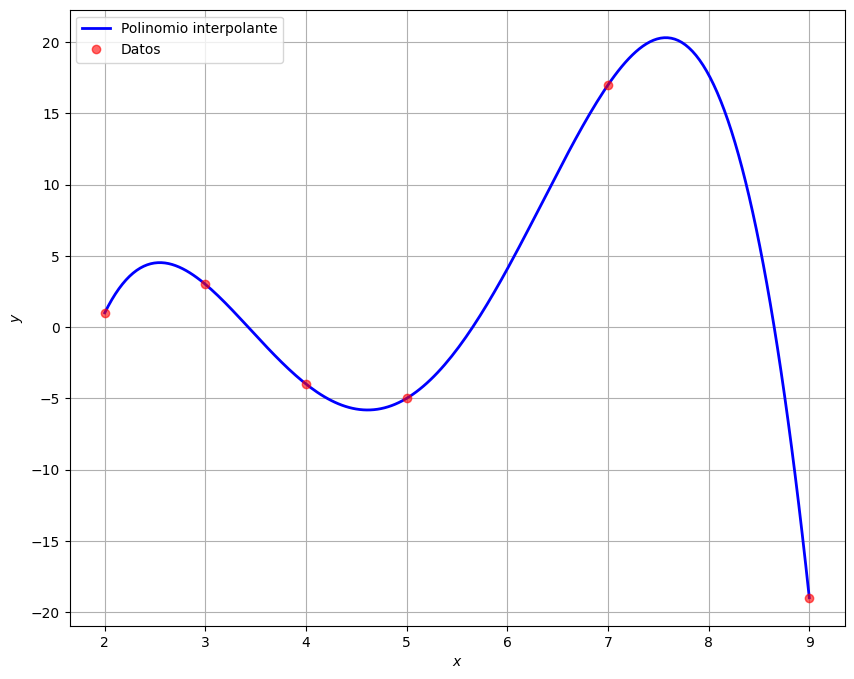

In [26]:
import matplotlib.pyplot as plt
'''Interpolación'''
x=np.array([2,3,4,5,7,9])
y=np.array([1,3,-4,-5,17,-19])
pol=interpLagrange(x,y)

print(pol)
print(pol(x))

"Gráfica"
a=x.min()
b=x.max()
xx=np.linspace(a,b,200)
yy=pol(xx)

fig, ax=plt.subplots(figsize=(10,8))
ax.plot(xx,yy,'b',lw=2,label='Polinomio interpolante')
ax.plot(x,y,'ro',alpha=0.6,label='Datos')
ax.legend(loc=2)
ax.set_xlabel(r"$x$",fontsize=10)
ax.set_ylabel(r"$y$",fontsize=10)
plt.grid()
plt.show()


In [ ]:

print(p)
print(p.degree)
print(p.coef)
print(p.roots)
q=P.Polynomial([-1,1])  